# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# importing dataset

In [2]:
data = pd.read_csv('FuelEconomy.csv')

In [3]:
data.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [4]:
data.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [6]:
data.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


# visualize

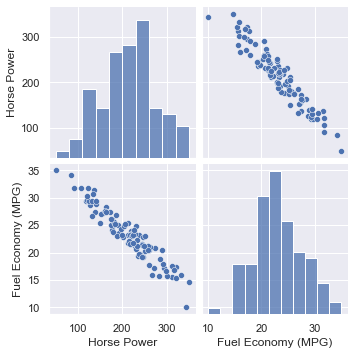

In [7]:
sns.pairplot(data)

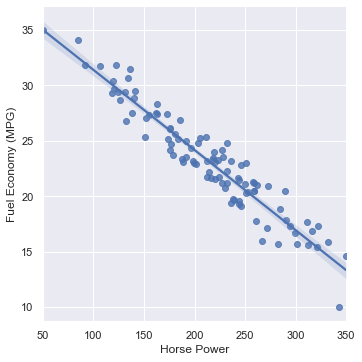

In [8]:
 sns.lmplot(x='Horse Power',y='Fuel Economy (MPG)' ,data = data)

# Spliting dataset

In [9]:
X = data[['Horse Power']]

In [10]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [11]:
y = data['Fuel Economy (MPG)']

In [12]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape

(80, 1)

In [15]:
X_test.shape

(20, 1)

In [16]:
y_train.shape

(80,)

In [17]:
y_test.shape

(20,)

# Training the model

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = True)
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
print('Linear Model coefficient(m) : ',reg.coef_)
print('Linear Model coefficient(b) : ',reg.intercept_)

Linear Model coefficient(m) :  [-0.0733005]
Linear Model coefficient(b) :  38.877259082477316


# test the model

In [20]:
y_predict = reg.predict(X_test)

In [21]:
y_predict

array([21.85566531, 20.50014248, 22.51807886, 29.1525131 , 22.18889979,
       20.36504254, 29.93165405, 24.29351481, 15.28617054, 30.17129996,
       29.79637526, 13.22208354, 19.68336809, 18.16222608, 21.45570273,
       22.85418435, 23.15543817, 15.3513636 , 27.48523469, 25.97789405])

In [22]:
y_test

83    21.216359
53    20.291766
70    23.307192
45    26.778148
44    21.205987
39    20.407571
22    31.796612
80    23.172223
10    17.300628
0     29.344195
18    29.393330
30    14.589079
73    21.050399
33    15.676316
90    19.723462
4     23.426739
76    22.183092
77    15.441711
12    27.294930
31    26.188478
Name: Fuel Economy (MPG), dtype: float64

# visualize the model

Text(0.5, 1.0, 'HorsePower vs FuelEconomy (Trining set)')

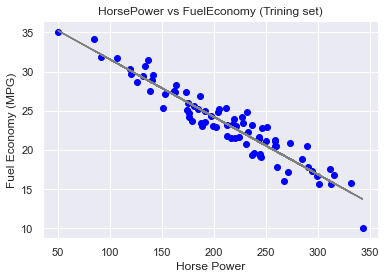

In [23]:
plt.scatter(X_train,y_train,color = 'blue')
plt.plot(X_train, reg.predict(X_train),color = 'grey')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.title('HorsePower vs FuelEconomy (Trining set)')

Text(0.5, 1.0, 'HorsePower vs FuelEconomy (Trining set)')

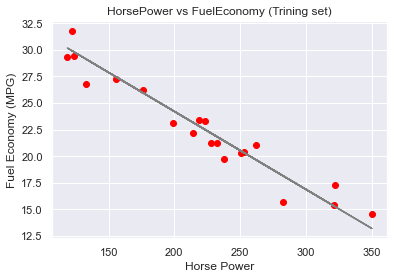

In [24]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test, reg.predict(X_test),color = 'grey')
plt.xlabel('Horse Power')
plt.ylabel('Fuel Economy (MPG)')
plt.title('HorsePower vs FuelEconomy (Trining set)')

# prediction

In [29]:
HP = pd.DataFrame(np.array([400]))

fuelEconomy = reg.predict(HP)

In [30]:
print(f'The Predicted Fuel Economy is : {fuelEconomy}')

The Predicted Fuel Economy is : [9.55705846]


# accuracy

In [31]:
from sklearn.metrics import r2_score

acc = np.round(r2_score(y_test,y_predict)*100,2)

In [32]:
print(f'accuracy of model : {acc}%')

accuracy of model : 92.92%
